In [1]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
cwd = os.getcwd()
print("Packages Loaded")
print("Current folder is [%s]" %(cwd))

Packages Loaded
Current folder is [/Users/baeseonghyun/Image-Processing-Practice/custom_dataset]


## Configuration

In [2]:
#Folder Locations
paths= ["img_dataset/Arnold_Schwarzenegger",
       "img_dataset/Junichiro_Koizumi",
       "img_dataset/Vladimir_Putin",
       "img_dataset/George_W_Bush"]
categories = ['Terminator', 'Koizumi', 'Putin', 'Bush']

#Configurations
imgsize = [64, 64]
use_gray = 0 #회색 이미지(1)를 만들 것인지, 컬러 이미지(0)를 만들것인지
data_name = "custom_data"
print("Your images shoud be at")
for i, path in enumerate(paths):
    print("[%d/%d] %s "%(i, len(paths), path))
print("Data will be saved to \n [%s]" % (cwd + '/data/'+data_name+'.npz'))

Your images shoud be at
[0/4] img_dataset/Arnold_Schwarzenegger 
[1/4] img_dataset/Junichiro_Koizumi 
[2/4] img_dataset/Vladimir_Putin 
[3/4] img_dataset/George_W_Bush 
Data will be saved to 
 [/Users/baeseonghyun/Image-Processing-Practice/custom_dataset/data/custom_data.npz]


## RGB to Gray

In [3]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        return rgb

## Load Images

In [4]:
nclass = len(paths)
valid_exts= [".jpg", ".gif", ".png", ".tga", ".jpeg"] #유효한 확장자
imgcnt =0
for i, relpath in zip(range(nclass), paths):
    path = cwd+"/"+relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath=os.path.join(path, f)
        currimg = imread(fullpath)
        #Convert to gray
        if use_gray:
            final_img = rgb2gray(currimg)
        else:
            final_img = currimg
        #RESIZE
        final_small=imresize(final_img, [imgsize[0], imgsize[1]])/255.
        final_vec=np.reshape(final_small, (1, -1))
        # SAVE
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg = final_vec
            totallabel = curr_label
        else:
            totalimg = np.concatenate((totalimg, final_vec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt += 1
        
print("Total %d Images" %(imgcnt))            

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.


Total 681 Images


## Devide into traning and test

In [5]:
def print_shape(string, x):
    print("Shape of [%s] is [%s]" % (string, x.shape,))
    
randidx = np.random.randint(imgcnt, size=imgcnt)
trainidx = randidx[0:int(4*imgcnt/5)]
testidx =randidx[int(4*imgcnt/5):imgcnt]
trainimg = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg = totalimg[testidx, :]
testlabel = totallabel[testidx, :]

print_shape("totalimg", totalimg)
print_shape("totallabel", totallabel)
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

Shape of [totalimg] is [(681, 12288)]
Shape of [totallabel] is [(681, 4)]
Shape of [trainimg] is [(544, 12288)]
Shape of [trainlabel] is [(544, 4)]
Shape of [testimg] is [(137, 12288)]
Shape of [testlabel] is [(137, 4)]


## Save to npz

In [6]:
savepath=cwd +"/data/"+data_name+".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel, testimg=testimg, testlabel=testlabel, imgsize=imgsize, use_gray=use_gray, categories=categories)
print("Saved to [%s]" % (savepath))

Saved to [/Users/baeseonghyun/Image-Processing-Practice/custom_dataset/data/custom_data.npz]


## Load NPZ

In [7]:
# Load
cwd = os.getcwd()
loadpath = cwd + "/data/"+data_name+".npz"
l =np.load(loadpath)
print(l.files)

#Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']
categories_loaded = l['categories']

print("[%d] Training Images" % (trainimg_loaded.shape[0]))
print("[%d] Test Images" % (testimg_loaded.shape[0]))
print("Loaded From [%s]" % (loadpath))


['trainimg', 'trainlabel', 'testimg', 'testlabel', 'imgsize', 'use_gray', 'categories']
[544] Training Images
[137] Test Images
Loaded From [/Users/baeseonghyun/Image-Processing-Practice/custom_dataset/data/custom_data.npz]


## Plot loaded data

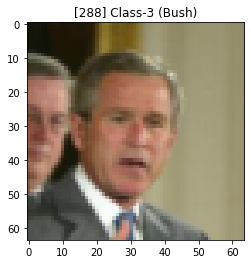

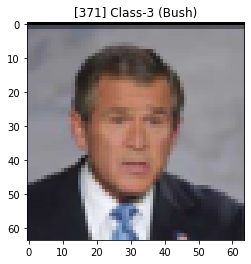

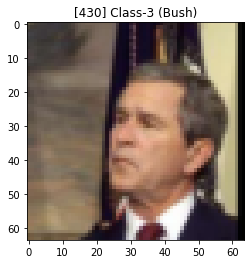

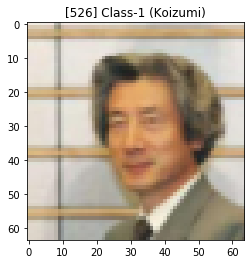

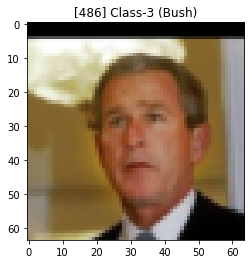

In [8]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size=5
randidx=np.random.randint(ntrain_loaded, size=batch_size)

for i in randidx:
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot)
    if use_gray:
        currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg=np.reshape(trainimg_loaded[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string= ("[%d] Class-%d (%s)" %(i, currlabel, categories_loaded[currlabel]))
    plt.title(title_string)
    plt.show()